In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

C:\Users\joaol\AppData\Local\Temp\ipykernel_10880\3842550285.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
plt.rcParams['figure.figsize'] = [15, 10]

In [6]:
url = "https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/social-network-ads.csv"
compras = pd.read_csv(url, sep=",")
compras.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


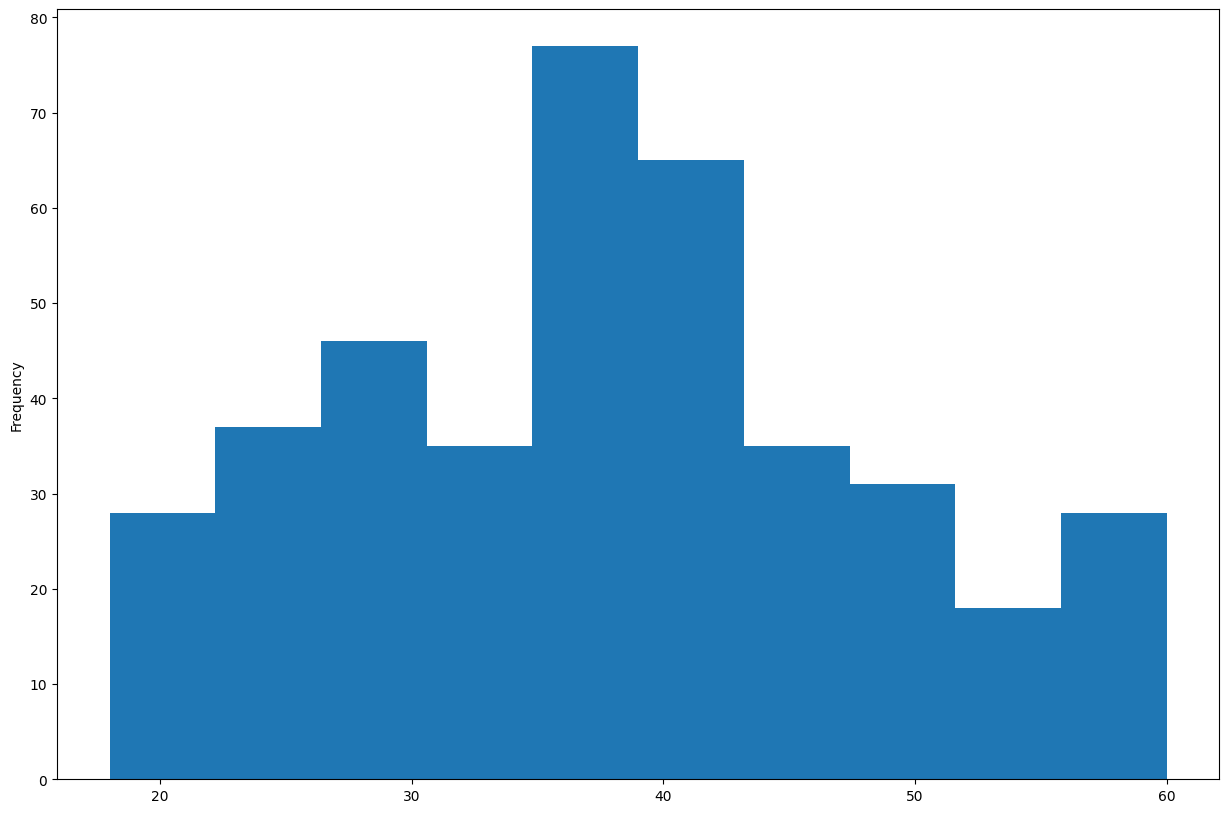

In [7]:
compras['Age'].plot.hist()
plt.show()

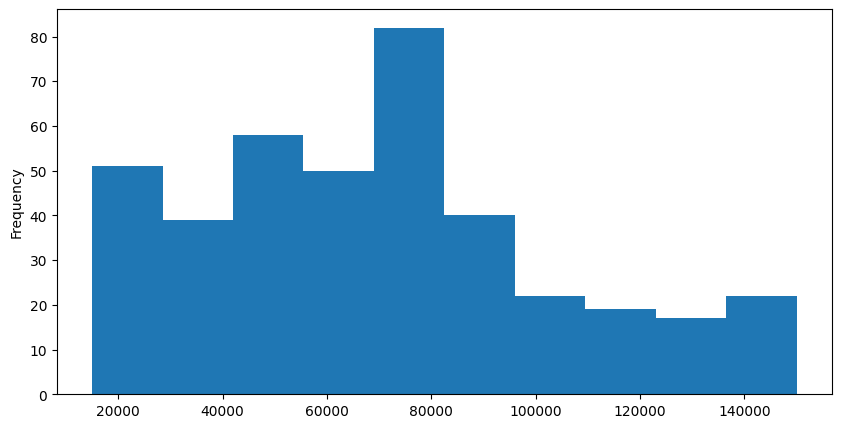

In [9]:
plt.figure(figsize=(10,5))
compras['EstimatedSalary'].plot.hist()
plt.show()

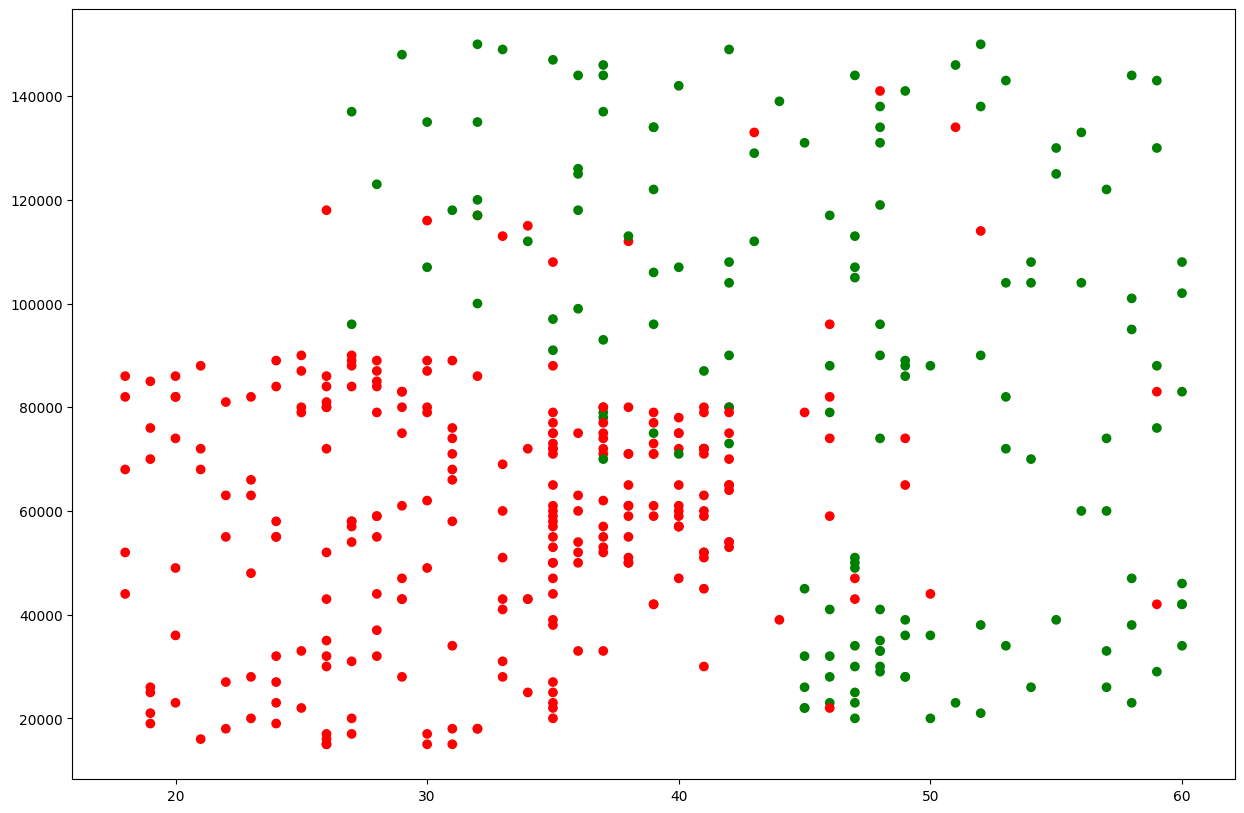

In [10]:
fig, ax = plt.subplots()
colors = {0: "red", 1: "green"}
ax.scatter(compras['Age'], compras['EstimatedSalary'], c=compras['Purchased'].map(colors))
plt.show()

In [14]:
atributos = compras[['Age', 'EstimatedSalary']]
classes = compras['Purchased']

In [17]:
compras_treino, compras_teste, classes_treino, classes_teste = train_test_split(atributos, classes, test_size=0.1)

In [18]:
# Redução de escala
scaler = StandardScaler()
compras_treino = scaler.fit_transform(compras_treino)
compras_teste = scaler.transform(compras_teste)

In [19]:
# Kernel polinomial, de grau 3, com dados escalados, margem mínima, e kappa = 2
SVM_polinomial = SVC(kernel="poly", degree=3, gamma="scale", C=1.0, coef0=2)
SVM_polinomial.fit(compras_treino, classes_treino)

SVC(coef0=2, kernel='poly')

In [26]:
# Teste com SVM Linear (Acurácia bastante reduzida)

SVM_linear = SVC(kernel="linear")
SVM_linear.fit(compras_treino, classes_treino)

predicao_linear = SVM_linear.predict(compras_teste)
accuracy_linear = accuracy_score(classes_teste, predicao_linear)

print("Acurácia de classificação: {}".format(round(accuracy_linear, 3)*100) + "%")

Acurácia de classificação: 87.5%


In [22]:
# Teste com SVM Polinomial de grau 3

predicao = SVM_polinomial.predict(compras_teste)
acuracia = accuracy_score(classes_teste, predicao)

print("Acurácia de classificação: {}".format(round(acuracia, 3)*100) + "%")


Acurácia de classificação: 95.0%


In [27]:
# Teste com SVM Sigmoidal, com C = 0.2 (Alta margem)
SVM_sigmoidal = SVC(kernel="sigmoid", gamma="scale", C=0.2, coef0=2)
SVM_sigmoidal.fit(compras_treino, classes_treino)

SVC(C=0.2, coef0=2, kernel='sigmoid')

In [28]:
predicao_sigmoidal = SVM_sigmoidal.predict(compras_teste)
acuracia_sigmoidal = accuracy_score(classes_teste, predicao_sigmoidal)
print("Acurácia de classificação: {}".format(round(acuracia_sigmoidal, 3)*100) + "%")

Acurácia de classificação: 77.5%
